<a href="https://colab.research.google.com/github/JAlonMor/Webscraping/blob/main/EDA_coches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Clonar repositorio de GitHub si no está disponible

import os
curr_dir = os.getcwd()

if not os.path.exists(os.path.join(curr_dir, '../.ROOT_DIR')):
  !git clone https://github.com/JAlonMor/Webscraping.git
  os.chdir(os.path.join(curr_dir, 'Webscraping/EDA'))



Cloning into 'Webscraping'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 43 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (43/43), done.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Creo DataFrame a partir de los datos obtenidos mediante web scraping

coches = pd.read_csv("/content/Webscraping/EDA/coches_net.csv")

In [5]:
coches.head()

,titulo,precio,kilometros,año,combustible,ciudad,garantia,url
0,MERCEDES-BENZ Clase C C 220 d 4p.,16200,281000,2017,1.0,Baleares,False,/mercedes-benz-clase-c-c-220-d-4p-diesel-2017-...
1,MERCEDES-BENZ Clase C C 220 d Estate 5p.,26900,114336,2017,1.0,Badajoz,True,/mercedes-benz-clase-c-c-220-d-estate-5p-diese...
2,MERCEDES-BENZ Clase C C 220 d Avantgarde Estat...,11000,287500,2015,1.0,Valladolid,False,/mercedes-benz-clase-c-c-220-d-avantgarde-esta...
3,MERCEDES-BENZ Clase C C 220 d Avantgarde 4p.,22900,110000,2015,1.0,Valencia,True,/mercedes-benz-clase-c-c-220-d-avantgarde-4p-d...
4,MERCEDES-BENZ Clase C C 300 d 4p.,68000,10650,2021,4.0,Cádiz,True,/mercedes-benz-clase-c-c-300-d-4p-electrico-hi...


In [6]:
coches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   titulo       1927 non-null   object 
 1   precio       1927 non-null   int64  
 2   kilometros   1927 non-null   int64  
 3   año          1927 non-null   int64  
 4   combustible  1925 non-null   float64
 5   ciudad       1927 non-null   object 
 6   garantia     1927 non-null   bool   
 7   url          1927 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 107.4+ KB


## Limpieza

In [7]:
# Tenemos dos valores nulos en la variable combustible

coches[coches.combustible.isnull()]

,titulo,precio,kilometros,año,combustible,ciudad,garantia,url
416,MERCEDES-BENZ Clase C 5p.,28500,150000,2015,NaN,Guipúzcoa,False,/mercedes-benz-clase-c--5p-otros-2015-en-guipu...
1566,MERCEDES-BENZ,33300,34400,2017,NaN,Murcia,False,/mercedes-benz-clase-c--5p-otros-2017-en-murci...


In [8]:
# Al ser solo dos observaciones, trataré de solucionarlo manualmente. Veamos las URL

coches.iloc[416,:].url

'/mercedes-benz-clase-c--5p-otros-2015-en-guipuzcoa-51760617-covo.aspx'

Es un híbrido diésel (4)

In [9]:
coches.iloc[1566,:].url

'/mercedes-benz-clase-c--5p-otros-2017-en-murcia-51484724-covo.aspx'

Es un híbrido enchufable (gasolina) (5)

In [10]:
coches.combustible.unique()

array([ 1.,  4.,  2.,  5., nan])

Códigos de los diferentes combustibles

* 1 $\rightarrow$ Diésel
* 2 $\rightarrow$ Gasolina
* 4 $\rightarrow$ Híbrido
* 5 $\rightarrow$ Híbrido enchufable


In [11]:
coches.iloc[416,:].combustible = 4.0
coches.iloc[1566,:].combustible = 5.0

In [12]:
coches.iloc[416,4] = 4.0
coches.iloc[1566,4] = 5.0

In [13]:
coches[coches.combustible.isnull()]

,titulo,precio,kilometros,año,combustible,ciudad,garantia,url


In [14]:
# Ahora cambio el tipo de variable a entero (combustible)
coches['combustible'] = coches['combustible'].astype(int)
coches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titulo       1927 non-null   object
 1   precio       1927 non-null   int64 
 2   kilometros   1927 non-null   int64 
 3   año          1927 non-null   int64 
 4   combustible  1927 non-null   int64 
 5   ciudad       1927 non-null   object
 6   garantia     1927 non-null   bool  
 7   url          1927 non-null   object
dtypes: bool(1), int64(4), object(3)
memory usage: 107.4+ KB


In [15]:
coches.head()

,titulo,precio,kilometros,año,combustible,ciudad,garantia,url
0,MERCEDES-BENZ Clase C C 220 d 4p.,16200,281000,2017,1,Baleares,False,/mercedes-benz-clase-c-c-220-d-4p-diesel-2017-...
1,MERCEDES-BENZ Clase C C 220 d Estate 5p.,26900,114336,2017,1,Badajoz,True,/mercedes-benz-clase-c-c-220-d-estate-5p-diese...
2,MERCEDES-BENZ Clase C C 220 d Avantgarde Estat...,11000,287500,2015,1,Valladolid,False,/mercedes-benz-clase-c-c-220-d-avantgarde-esta...
3,MERCEDES-BENZ Clase C C 220 d Avantgarde 4p.,22900,110000,2015,1,Valencia,True,/mercedes-benz-clase-c-c-220-d-avantgarde-4p-d...
4,MERCEDES-BENZ Clase C C 300 d 4p.,68000,10650,2021,4,Cádiz,True,/mercedes-benz-clase-c-c-300-d-4p-electrico-hi...


## Transformaciones

Transformaciones a realizar:

Sacar más información de las columnas "titulo" y "url"
Crear nueva columna con url completa añadiendo la url base de coches.net
Crear otra variable con las coordenadas de cada ciudad
Crear variable con max-min de kilometros (el escalado se hace con los datos de entrenamiento creo)
Crear variable con la antigüedad de cada coche: now-año
Crear variable dummy con el combustible

Buscar outliers en las variables, boxplot
Realizar estudios de distribuciones de las variables
Estudio de la correlaciones entre las variables.
Estudio de las correlaciones con la variable objetivo "precio"
Hacer gráfico con mapa con las posiciones de las ciudades donde se venden los coches.
Usar métodos de filtrado para regesion, f_regression y mutual_info_regession. F-test score y Mutual information




### TRANSFORMACIONES<br/>



* [X] Poner URL completa
* [X] Extraer más información de "titulo" y "url"
* [X] Coordenadas GPS de ciudades
* [X] Escalado de variable kilómetros
* [X] Crear nueva variable con la antigüedad del coches en años. Escalar.
* [X] Variables binarias para combustible
* [ ] Crear archivo de salida para modelar



### ANALISIS Y EXPLORACIONES

* [X] Box plot de caracterísitcas.
* [X] Análisis por agrupación de ciudades.
* [X] Estudio de las distintas distribuciones.
* [ ] Estudio de correlaciones entre las variables.
* [ ] Estudio de correlaciones entre las variables y "precio".
* [ ] Estudio según localización GPS.

### Poner URL completa

In [16]:
# Creamos URL completa
from urllib.parse import urljoin

url_base = "https://www.coches.net/"
coches['web'] = [urljoin(url_base, url) for url in coches['url']]

In [17]:
# Compruebo
coches.web[0]

'https://www.coches.net/mercedes-benz-clase-c-c-220-d-4p-diesel-2017-en-baleares-51618684-covo.aspx'

### Extraer información de "titulo" y de "url"

In [18]:
# Aumento la cantidad de caracteres a mostrar por pantalla
pd.options.display.max_colwidth = 200

In [19]:
print(coches.loc[[0],['titulo']])
print(coches.loc[[0],['url']]) ##, 'url']]),

                              titulo
0  MERCEDES-BENZ Clase C C 220 d 4p.
                                                                            url
0  /mercedes-benz-clase-c-c-220-d-4p-diesel-2017-en-baleares-51618684-covo.aspx


In [20]:
coches.sample(5)

,titulo,precio,kilometros,año,combustible,ciudad,garantia,url,web
1500,MERCEDES-BENZ Clase C C 220 d Estate 5p.,16400,199700,2016,1,Valencia,False,/mercedes-benz-clase-c-c-220-d-estate-5p-diesel-2016-en-valencia-51538492-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-estate-5p-diesel-2016-en-valencia-51538492-covo.aspx
991,MERCEDES-BENZ Clase C C 220 BlueTEC Estate 5p.,23490,108000,2015,1,Barcelona,True,/mercedes-benz-clase-c-c-220-bluetec-estate-5p-diesel-2014-en-barcelona-51682636-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-bluetec-estate-5p-diesel-2014-en-barcelona-51682636-covo.aspx
102,MERCEDES-BENZ Clase C C Cabrio 250 d 2p.,41950,19000,2017,1,Barcelona,True,/mercedes-benz-clase-c-c-cabrio-250-d-diesel-2017-en-barcelona-50487837-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-cabrio-250-d-diesel-2017-en-barcelona-50487837-covo.aspx
125,MERCEDES-BENZ Clase C C 200 d 4p.,38900,21400,2020,1,Barcelona,True,/mercedes-benz-clase-c-c-200-d-4p-diesel-2020-en-barcelona-51420487-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-200-d-4p-diesel-2020-en-barcelona-51420487-covo.aspx
172,MERCEDES-BENZ Clase C C 220 d 4p.,53600,1,2022,1,Valencia,True,/mercedes-benz-clase-c-c-220-d-4p-diesel-2021-en-valencia-51120402-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-4p-diesel-2021-en-valencia-51120402-covo.aspx


In [21]:
import regex as re

Crear nueva variable "tipo", con tipo de modelo clase C que es el coche. En caso no obtener esa información, identificar con la palabra "NoInfo"

In [22]:
coches['tipo'] = coches['url'].str.extract('-(\d{2,3})-').fillna('NoInfo')

In [23]:
coches.tipo.sample(10)

583     250
1340     43
1544     43
62      220
359     220
941     220
1116    220
689     220
1598    220
684     220
Name: tipo, dtype: object

In [24]:
coches.value_counts('tipo')

tipo
220       1092
200        279
NoInfo     132
250        111
63          76
300         71
43          69
180         56
350         33
450          4
400          3
45           1
dtype: int64

Crear nueva variable booleana, indicango si el vehículo tiene el acabado AMG True o no False

In [25]:
coches['AMG'] = False
coches.loc[coches.url.str.contains('amg', case=True),'AMG'] = True

In [26]:
coches.value_counts('AMG')

AMG
False    1521
True      406
dtype: int64

### Coordenadas GPS de ciudades

Creo una función para obtener las coordenadas de la cada ciudad

In [27]:
def get_coordinates(cities):
  '''
  Given the column name with the cities, get coordinates for every city in two
  differents columns, "lat_ciudad" and "lat_ciudad" in a new DF
  '''
  
  from geopy.geocoders import Nominatim

  geolocator = Nominatim(user_agent="MyApp")
  ciudades = coches[cities].value_counts().index.tolist()

  lat_ciudad = []
  long_ciudad = []

  for ciudad in ciudades:
    location = geolocator.geocode(ciudad) 
    lat_ciudad.append(location.latitude)
    long_ciudad.append(location.longitude)

  df_ciudades = pd.DataFrame(list(zip(ciudades, lat_ciudad, long_ciudad)), columns =['ciudad', 'lat_ciudad', 'long_ciudad'])

  return df_ciudades



In [28]:
df_ciudades = get_coordinates('ciudad')

Ahora uno los dos dataframe para tener cada coordenada con cada ciudad de la tabla "coches"

In [29]:
coches = pd.merge(coches, df_ciudades, on = 'ciudad', how = 'left')
coches.head()

,titulo,precio,kilometros,año,combustible,ciudad,garantia,url,web,tipo,AMG,lat_ciudad,long_ciudad
0,MERCEDES-BENZ Clase C C 220 d 4p.,16200,281000,2017,1,Baleares,False,/mercedes-benz-clase-c-c-220-d-4p-diesel-2017-en-baleares-51618684-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-4p-diesel-2017-en-baleares-51618684-covo.aspx,220,False,39.613432,2.880354
1,MERCEDES-BENZ Clase C C 220 d Estate 5p.,26900,114336,2017,1,Badajoz,True,/mercedes-benz-clase-c-c-220-d-estate-5p-diesel-2017-en-badajoz-50946817-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-estate-5p-diesel-2017-en-badajoz-50946817-covo.aspx,220,False,38.878059,-6.970205
2,MERCEDES-BENZ Clase C C 220 d Avantgarde Estate 5p.,11000,287500,2015,1,Valladolid,False,/mercedes-benz-clase-c-c-220-d-avantgarde-estate-5p-diesel-2015-en-valladolid-51386008-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-avantgarde-estate-5p-diesel-2015-en-valladolid-51386008-covo.aspx,220,False,41.652133,-4.728562
3,MERCEDES-BENZ Clase C C 220 d Avantgarde 4p.,22900,110000,2015,1,Valencia,True,/mercedes-benz-clase-c-c-220-d-avantgarde-4p-diesel-2015-en-valencia-51457158-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-avantgarde-4p-diesel-2015-en-valencia-51457158-covo.aspx,220,False,39.469707,-0.376335
4,MERCEDES-BENZ Clase C C 300 d 4p.,68000,10650,2021,4,Cádiz,True,/mercedes-benz-clase-c-c-300-d-4p-electrico-hibrido-2021-en-cadiz-51662564-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-300-d-4p-electrico-hibrido-2021-en-cadiz-51662564-covo.aspx,300,False,36.529744,-6.292898


### Escalado de la variable "kilometros"

Creo función para devolver valores de una columna con su normalización Z

In [30]:
def norm_z(columna):
  '''
  Get the Z transformation from a given column
  '''

  z = (coches[columna] - coches[columna].mean() / coches[columna].std())
  return z

In [31]:
coches['z_kilometros'] = norm_z('kilometros')


### Crear nueva variable con la antigüedad del coches en años. Escalar.

Restar la fecha actual a la columna año para obtener los años del coches

In [32]:
from datetime import datetime

now = datetime.now().year
coches['años'] = now - coches['año']

In [33]:
coches.sample()

,titulo,precio,kilometros,año,combustible,ciudad,garantia,url,web,tipo,AMG,lat_ciudad,long_ciudad,z_kilometros,años
913,MERCEDES-BENZ Clase C MercedesAMG C 43 4MATIC 4p.,48990,27000,2017,2,Barcelona,True,/mercedes-benz-clase-c-mercedesamg-c-43-4matic-4p-gasolina-2017-en-barcelona-51423147-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-mercedesamg-c-43-4matic-4p-gasolina-2017-en-barcelona-51423147-covo.aspx,43,True,41.382894,2.177432,26998.419874,5


### Variables binarias para combustible y tipo

Crear variables con el tipo de combustible

In [34]:
# Usar dummies variables para generar las columnas binarias
# Eliminamos primera columna "combustible_1", por lo que si el resto valen 0, quiere decir que se trata de
# coche con combustible tipo 1 (diésel)
coches['tipo_combustible'] = coches['combustible']
coches['modelo_tipo'] = coches['tipo']
coches = pd.get_dummies(coches, prefix = 'combustible', columns = ['combustible'], drop_first = True)
coches = pd.get_dummies(coches, prefix = 'tipo', columns = ['tipo'], drop_first = True)
coches.sample(1)

,titulo,precio,kilometros,año,ciudad,garantia,url,web,AMG,lat_ciudad,...,tipo_220,tipo_250,tipo_300,tipo_350,tipo_400,tipo_43,tipo_45,tipo_450,tipo_63,tipo_NoInfo
254,MERCEDES-BENZ Clase C C 220 d 4p.,50900,14000,2021,Valencia,True,/mercedes-benz-clase-c-c-220-d-4p-diesel-2021-en-valencia-51549751-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-4p-diesel-2021-en-valencia-51549751-covo.aspx,False,39.469707,...,1,0,0,0,0,0,0,0,0,0


Salvaguardar DataFrame

In [35]:
coches_copy = coches.copy()

### Box plot de características.

Mostrar varibles categóricas en diagramas de caja y bigotes

<Figure size 1440x1440 with 0 Axes>

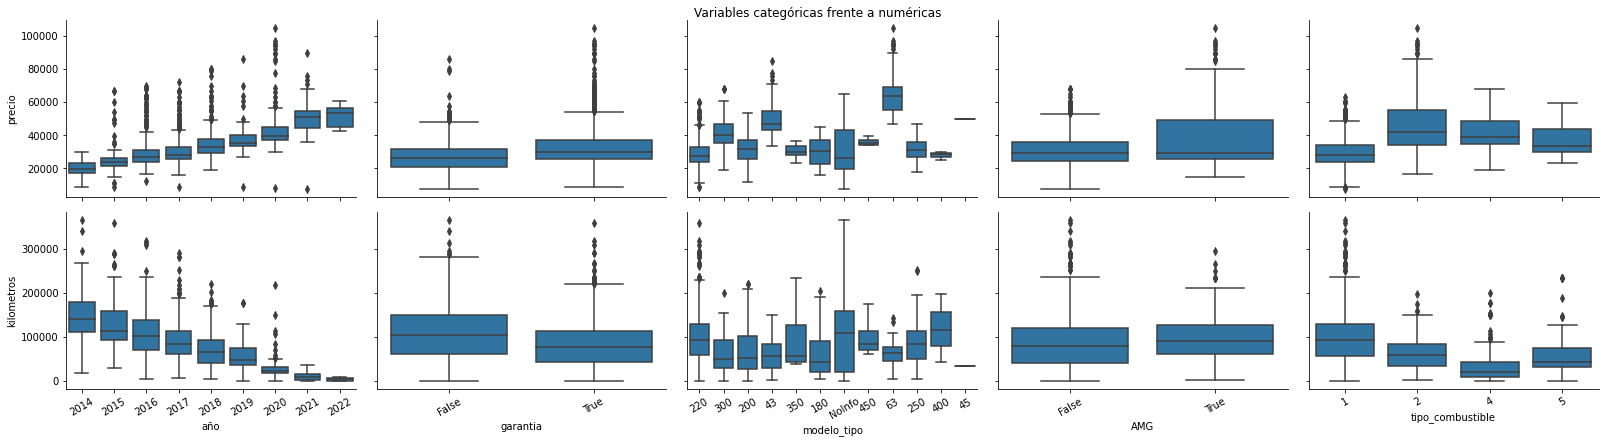

In [36]:
# Function from the example of the course. (Thaks to the author).
# Codigo utilizado durante la formación recibida por "Udacity"
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 30)
    
# Plotting the graph
plt.figure(figsize = [20, 20])
g = sns.PairGrid(data = coches, y_vars = ['precio', 'kilometros'], 
                x_vars = ['año', 'garantia', 'modelo_tipo', 'AMG', 'tipo_combustible'], height = 3, aspect = 1.5)

g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Variables categóricas frente a numéricas')
g.map(boxgrid)
plt.show();

### Análisis por agrupación

Analizar media y mediana de precios por ciudad

In [37]:
# Agrupar datos
coches_city_price_mean = coches.groupby('ciudad')['precio'].mean().reset_index()
coches_city_price_median = coches.groupby('ciudad')['precio'].median().reset_index()

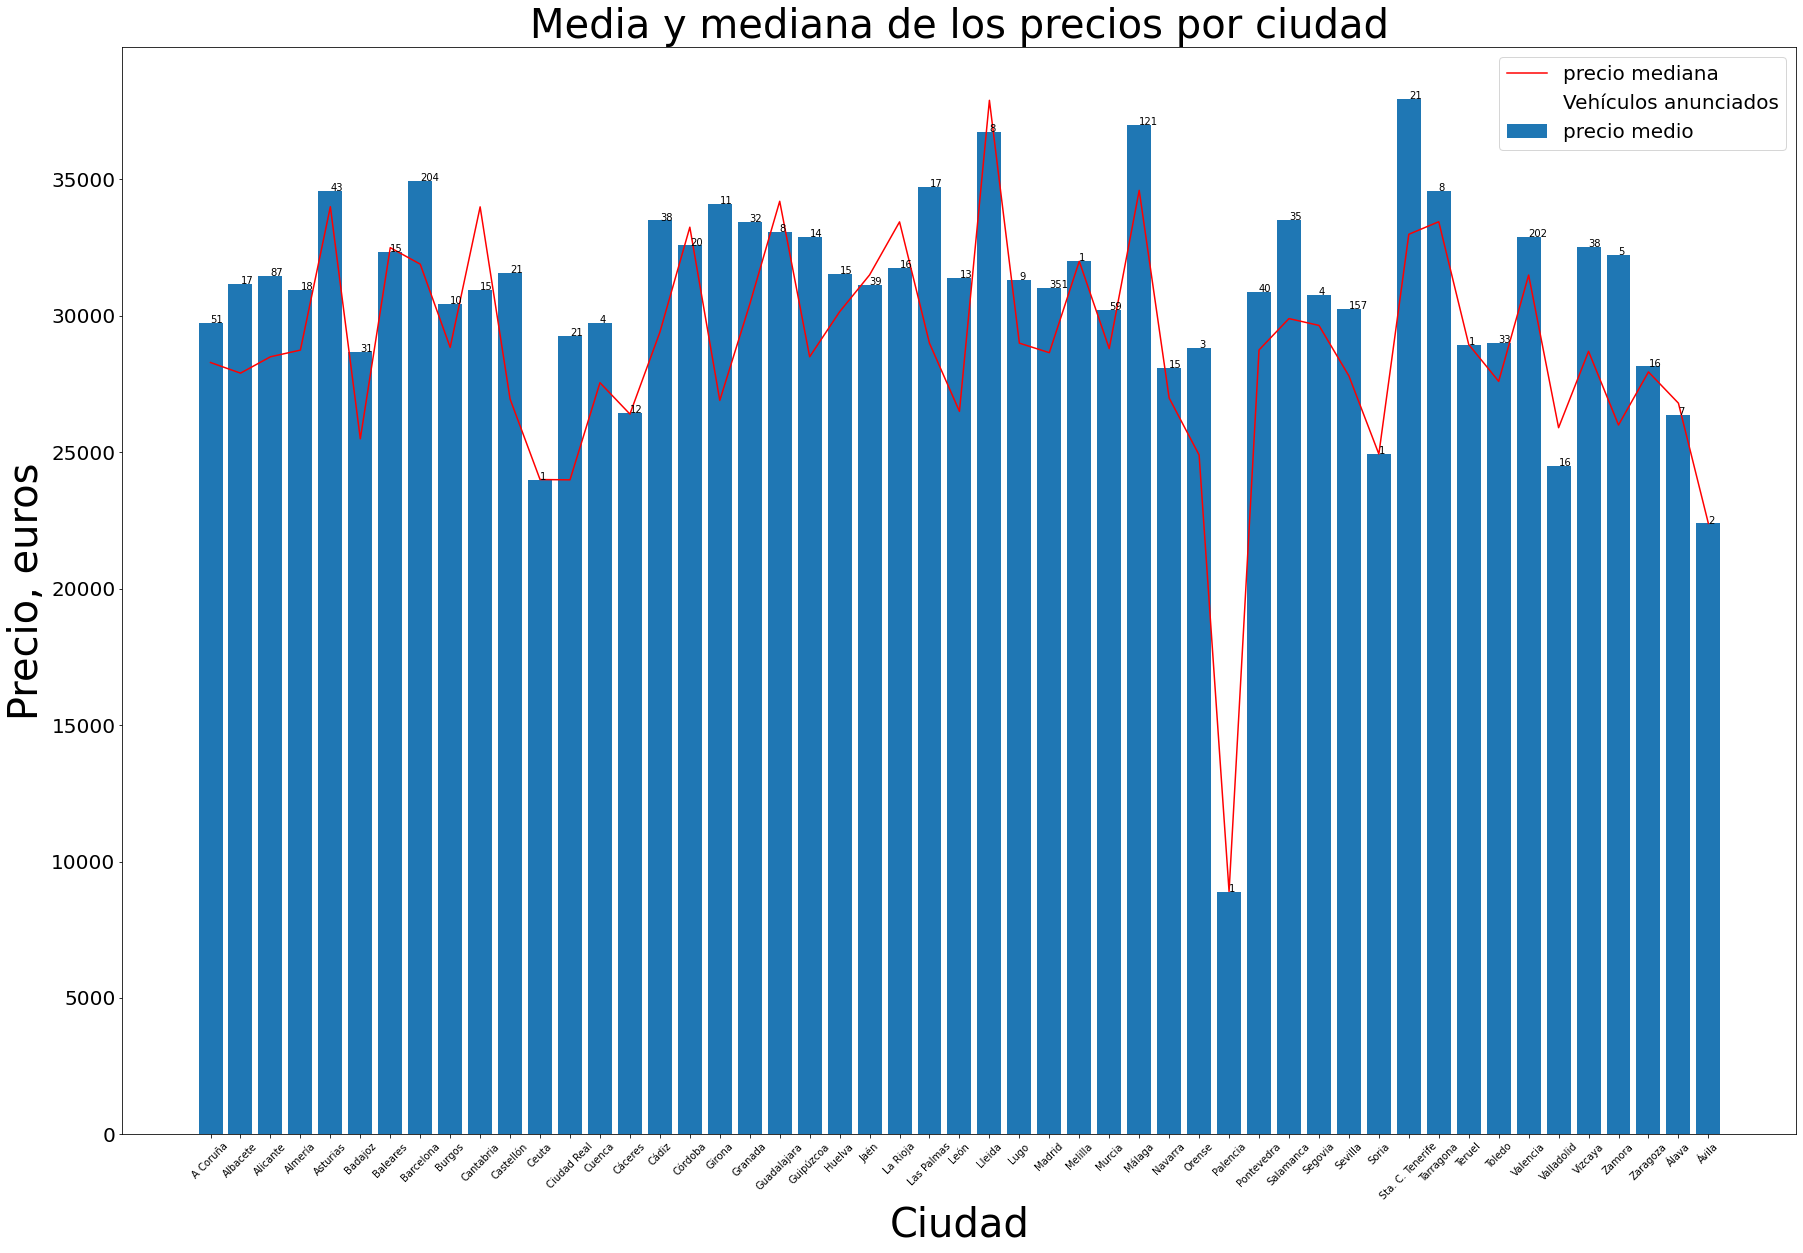

In [73]:
# Crear gráfico
plt.figure(figsize = (30,20))
bars_precio = plt.bar(coches_city_price_mean.ciudad,coches_city_price_mean.precio, label = 'precio medio')
median_precio = plt.plot(coches_city_price_median.ciudad, coches_city_price_median.precio, color = 'red', label = 'precio mediana')
plt.plot([], [], ' ', label="Vehículos anunciados")
plt.tick_params(axis = 'x',labelrotation = 45, labelsize = 10)
plt.tick_params(axis = 'y', labelsize = 20)
plt.ylabel('Precio, euros',fontdict = {'fontsize': 40})
plt.xlabel('Ciudad',fontdict = {'fontsize': 40})
plt.title('Media y mediana de los precios por ciudad',fontdict = {'fontsize': 40},pad = 0)
plt.legend(prop = {'size': 20})


# Añado texto en cada barra con el número de unidades por ciudad
nCiudad = coches.value_counts('ciudad').reset_index()
nCiudad = nCiudad.sort_values('ciudad')
x = coches_city_price_mean.ciudad
y = coches_city_price_mean.precio
n = nCiudad[0]
for x, y, n in zip(x, y, n):
   plt.text(x, y, n)

plt.show();

### Estudio de las distintas distribuciones.

Distribución de la variable precio

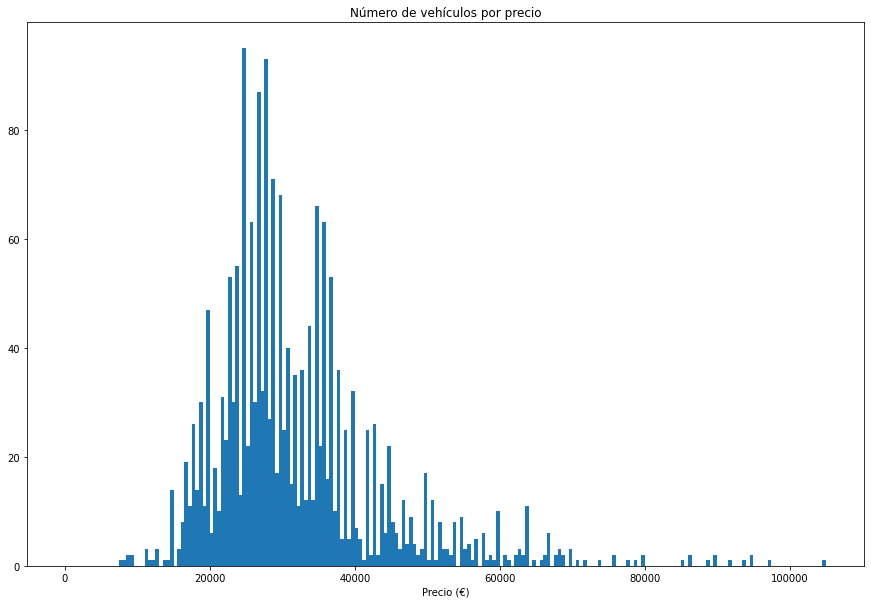

In [39]:
# Creando el histograma
binsize = 500
bins = np.arange(0, coches['precio'].max()+binsize, binsize)

plt.figure(figsize=[15, 10])
plt.hist(data = coches, x = 'precio', bins = bins)
plt.xlabel('Precio (€)')
plt.title('Número de vehículos por precio')
plt.show();

Distribución de la variable kilómetros

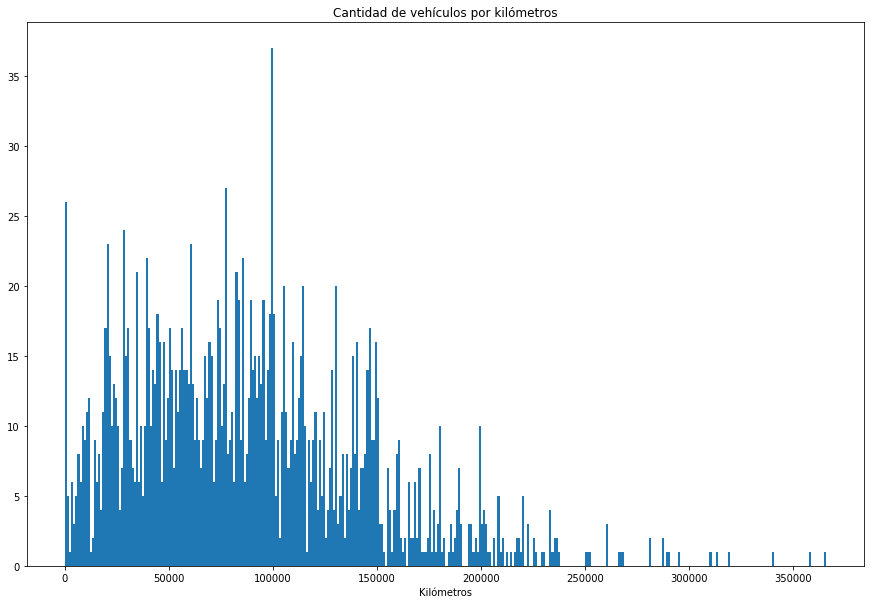

In [40]:
# Creando el histograma
binsize = 1000
bins = np.arange(0, coches['kilometros'].max()+binsize, binsize)

plt.figure(figsize=[15, 10])
plt.hist(data = coches, x = 'kilometros', bins = bins)
plt.xlabel('Kilómetros')
plt.title('Cantidad de vehículos por kilómetros')
plt.show();

### Estudio de correlaciones entre las variables.

In [41]:
## Poner matriz de correlación con heatmap

In [1]:
##Pruebas en sucio